# Image classification with Convolutional Neural Networks

### By Ali Shannon

In this project, I am looking to make an image classifier that uses convolutional neural networks provided by Tensorflow using Keras. Convolutional networks look hierarchical patterns in image-type datasets which makes them superior when it comes to image classifications.

> ![CNN](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)
> [Credit](https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)

In this kind of neural network, each neuron only sees a 'patch' of the layer before it. This drastically improves 

This [dataset](https://www.kaggle.com/prasunroy/natural-images) contains images from 7 different categories.

- Airplane images obtained from http://host.robots.ox.ac.uk/pascal/VOC
- Car images obtained from https://ai.stanford.edu/~jkrause/cars/car_dataset.html
- Cat images obtained from https://www.kaggle.com/c/dogs-vs-cats
- Dog images obtained from https://www.kaggle.com/c/dogs-vs-cats
- Flower images obtained from http://www.image-net.org
- Fruit images obtained from https://www.kaggle.com/moltean/fruits
- Motorbike images obtained from http://host.robots.ox.ac.uk/pascal/VOC
- Person images obtained from http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset


### Preprocessing

Here I import the libraries I will use and get the dataset ready for tensorflow.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import glob, os

%matplotlib inline

np.random.seed(42) # uniform output across runs

tf.logging.set_verbosity(tf.logging.INFO) #turn off annoying error messages

Find the class names from the folder names

In [2]:
classes = np.array(os.listdir('./'), dtype = 'O')
idx = np.argwhere([classes == '.ipynb_checkpoints', classes == 'CNN.ipynb'])
classes = np.delete(classes, idx)

Import images and filenames of images, then resize all images to 100x100 RGB 

In [3]:
images = []; filenames = []

for cl in classes:
    for file in glob.glob('{}/*.jpg'.format(cl)): # import all jpg images from all classes 
        im = Image.open(file) 
        filenames.append(im.filename) # label images
        im = im.resize((100,100)) # resize all images
        images.append(im) # store images

Convert images to numpy arrays 

In [4]:
X_raw = []

for image in images:
    arr = np.array(image)
    X_raw.append(arr)
    
X = np.array(X_raw)

Wherever the filename contains a certain class, assign that class to `l` and assign a given numerical value to `y` which will be our labels.

In [5]:
y = []; l = []

for label in filenames:
    for cl in classes:
        if cl in label:
            l.append(cl)
            y.append(np.argwhere(classes == cl))
            
y = np.array(y).flatten()

This checks the distributions of classes in the entire dataset

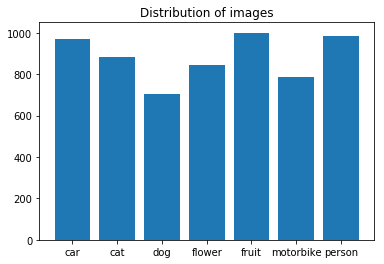

In [6]:
unique_vals, counts = np.unique(l, return_counts = True)

plt.bar(unique_vals, counts);
plt.title('Distribution of images')
plt.show()

Let's look at the pictures of some images with their labels and encoding:

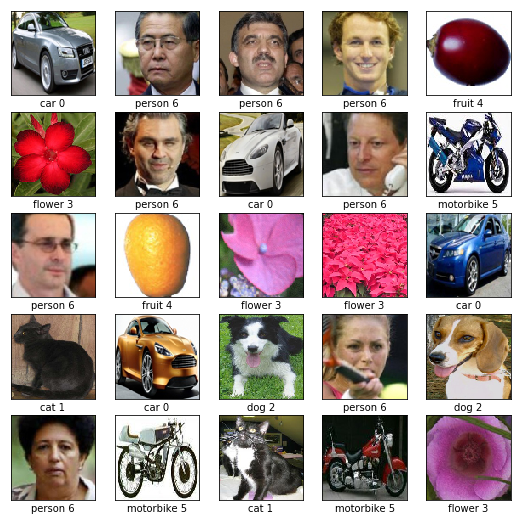

In [7]:
plt.figure(figsize=(9,9))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = np.random.randint(len(images))
    plt.imshow(X[j], cmap=plt.cm.binary)
    plt.xlabel(l[j] + ' ' + str(y[j]))
plt.show()

### Convolutional Neural Network Training and Testing

First, we need to split the dataset into training and validation sets, the validation set is outside of the training set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

This is where all the magic happens. I have opted for 4 convolutional layer with their respective pooling layers. Added dropouts and Batch Normalization as they improved the accuracy. I have also added 256 and 64 neuron ReLU activated dense layers that learn from the convolutional flattened images.

In [9]:
shapes = (100, 100, 3) # input shapes of all images

model = tf.keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation=tf.keras.activations.relu, input_shape=shapes),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.22), 
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation=tf.keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, kernel_size=(4, 4), activation=tf.keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.15),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.15),
    keras.layers.Flatten(),    
    keras.layers.Dense(256, activation=tf.keras.activations.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation=tf.keras.activations.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(len(classes), activation=tf.keras.activations.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 15)

Train on 4135 samples, validate on 2037 samples
Epoch 1/15
4135/4135 [==============================] - 10s 2ms/sample - loss: 1.6888 - acc: 0.5052 - val_loss: 1.2453 - val_acc: 0.6681
Epoch 2/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 1.0329 - acc: 0.7306 - val_loss: 0.9266 - val_acc: 0.7644
Epoch 3/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 0.8379 - acc: 0.7959 - val_loss: 0.8660 - val_acc: 0.8002
Epoch 4/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 0.7555 - acc: 0.8152 - val_loss: 0.7484 - val_acc: 0.8198
Epoch 5/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 0.6455 - acc: 0.8551 - val_loss: 0.6098 - val_acc: 0.8625
Epoch 6/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 0.5823 - acc: 0.8692 - val_loss: 0.6987 - val_acc: 0.8169
Epoch 7/15
4135/4135 [==============================] - 7s 2ms/sample - loss: 0.5412 - acc: 0.8723 - val_loss: 0.6418 - val_acc: 0.8385

In [11]:
y_pred = model.predict(X_test)

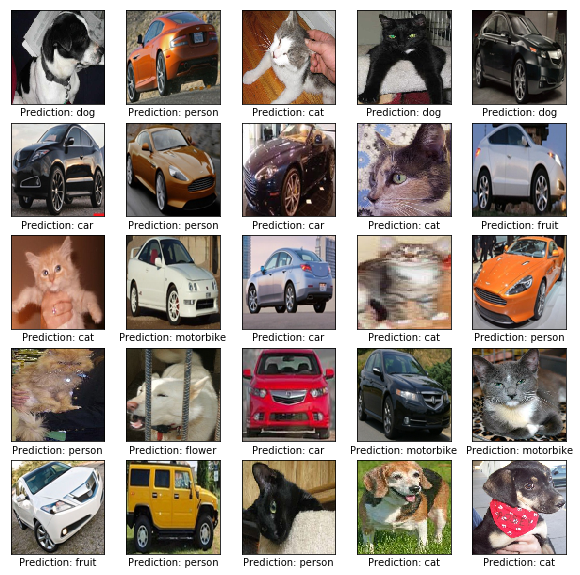

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = np.random.randint(len(X_test))
    plt.imshow(X[j], cmap=plt.cm.binary)
    plt.xlabel('Prediction: ' + classes[np.argmax(y_pred[j])])
plt.show()

While this is not particularly perfect, it is undoubtedly fascinating.

Here is the final accuracy of this model.

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)

2037/2037 [==============================] - 1s 556us/sample - loss: 0.4379 - acc: 0.8891


In [14]:
print('Final testing accuracy is ' + f'{val_acc *100} %')

Final testing accuracy is 88.90525102615356 %


This has been a fascinating experience toward artificial intelligence. Tensorflow is truly remarkable.